In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
with open("kddcup.names",'r') as f:
    print(f.read())

back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: con

In [3]:
cols = """
  duration,
  protocol_type,
  service,
  flag,
  src_bytes,
  dst_bytes,
  land,
  wrong_fragment,
  urgent,
  hot,
  num_failed_logins,
  logged_in,
  num_compromised,
  root_shell,
  su_attempted,
  num_root,
  num_file_creations,
  num_shells,
  num_access_files,
  num_outbound_cmds,
  is_host_login,
  is_guest_login,
  count,
  srv_count,
  serror_rate,
  srv_serror_rate,
  rerror_rate,
  srv_rerror_rate,
  same_srv_rate,
  diff_srv_rate,
  srv_diff_host_rate,
  dst_host_count,
  dst_host_srv_count,
  dst_host_same_srv_rate,
  dst_host_diff_srv_rate,
  dst_host_same_src_port_rate,
  dst_host_srv_diff_host_rate,
  dst_host_serror_rate,
  dst_host_srv_serror_rate,
  dst_host_rerror_rate,
  dst_host_srv_rerror_rate
"""

columns = []
for c in cols.split(','):
    if (c.strip()):
       columns.append(c.strip())

columns.append('target')
print(columns, len(columns))

['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'target'] 42


In [4]:
with open("training_attack_types",'r') as f:
    print(f.read())

back dos
buffer_overflow u2r
ftp_write r2l
guess_passwd r2l
imap r2l
ipsweep probe
land dos
loadmodule u2r
multihop r2l
neptune dos
nmap probe
perl u2r
phf r2l
pod dos
portsweep probe
rootkit u2r
satan probe
smurf dos
spy r2l
teardrop dos
warezclient r2l
warezmaster r2l




In [5]:
attacks_types = {
  'normal': 'normal',
  'back': 'dos',
  'buffer_overflow': 'u2r',
  'ftp_write': 'r2l',
  'guess_passwd': 'r2l',
  'imap': 'r2l',
  'ipsweep': 'probe',
  'land': 'dos',
  'loadmodule': 'u2r',
  'multihop': 'r2l',
  'neptune': 'dos',
  'nmap': 'probe',
  'perl': 'u2r',
  'phf': 'r2l',
  'pod': 'dos',
  'portsweep': 'probe',
  'rootkit': 'u2r',
  'satan': 'probe',
  'smurf': 'dos',
  'spy': 'r2l',
  'teardrop': 'dos',
  'warezclient': 'r2l',
  'warezmaster': 'r2l'
}

# READING DATASET

In [6]:
path = "kddcup.data_10_percent.gz"
df = pd.read_csv(path, names=columns)

# Adding Attack Type column
df['Attack Type'] = df.target.apply(lambda r: attacks_types[r[:-1]])

df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [7]:
df.shape

(494021, 43)

In [8]:
df['target'].value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: target, dtype: int64

In [9]:
df['Attack Type'].value_counts()

dos       391458
normal     97278
probe       4107
r2l         1126
u2r           52
Name: Attack Type, dtype: int64

In [10]:
df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

# DATA PREPROCESSING

In [11]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [12]:
# Finding categorical features
num_cols = df._get_numeric_data().columns

cate_cols = list(set(df.columns) - set(num_cols))
cate_cols.remove('target')
cate_cols.remove('Attack Type')

cate_cols

['protocol_type', 'service', 'flag']

# CATEGORICAL FEATURES DISTRIBUTION

In [13]:
# Visualization
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")

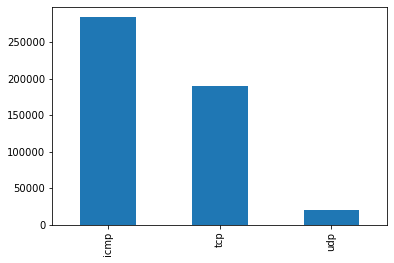

In [14]:
bar_graph('protocol_type')

Protocol type: We notice that ICMP is the most present in the used data, then TCP and almost 20000 packets of UDP type

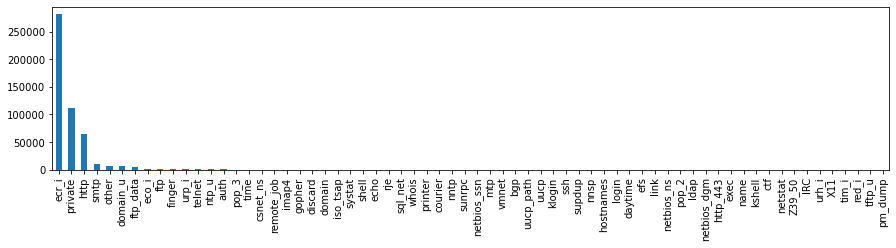

In [15]:
plt.figure(figsize=(15,3))
bar_graph('service')

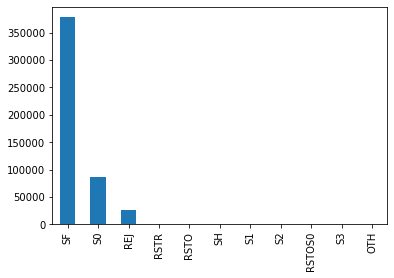

In [16]:
bar_graph('flag')

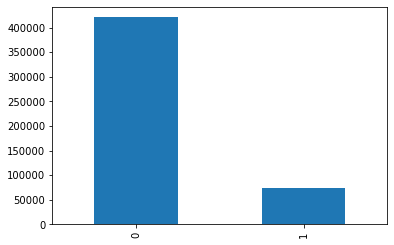

In [17]:
bar_graph('logged_in')

logged_in (1 if successfully logged in; 0 otherwise): We notice that just 70000 packets are successfully logged in.

# TARGET FEATURE DISTRIBUTION

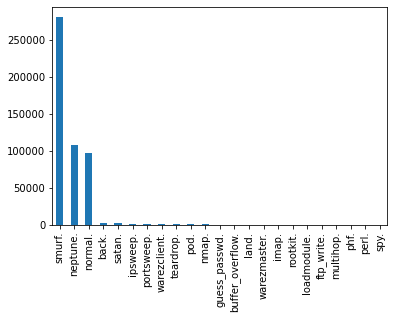

In [18]:
bar_graph('target')

Attack Type(The attack types grouped by attack, it's what we will predict)

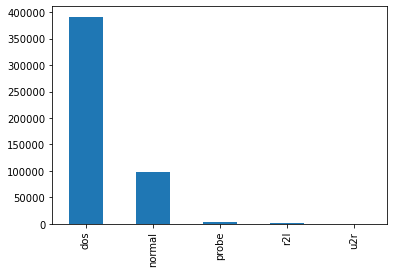

In [19]:
bar_graph('Attack Type')

In [20]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'target', 'Attack Type'],
      dtype='object')

# DATA CORRELATION

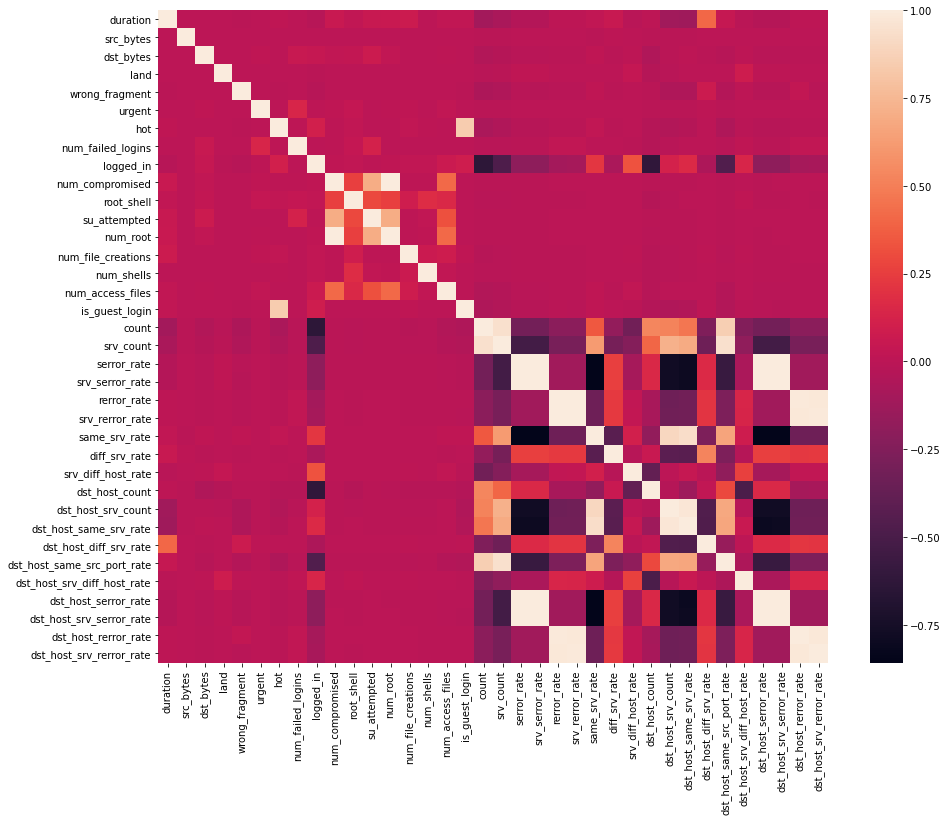

In [21]:
df = df.dropna('columns') # drop columns with NaN

df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values

corr = df.corr()

plt.figure(figsize=(15,12))

sns.heatmap(corr)

plt.show()

In [22]:
df['num_root'].corr(df['num_compromised'])

0.9938277978738366

In [23]:
df['srv_serror_rate'].corr(df['serror_rate'])

0.9983615072725952

In [24]:
df['srv_count'].corr(df['count'])

0.9436670688882655

In [25]:
df['srv_rerror_rate'].corr(df['rerror_rate'])

0.9947309539817937

In [26]:
df['dst_host_same_srv_rate'].corr(df['dst_host_srv_count'])

0.9736854572953983

In [27]:
df['dst_host_srv_serror_rate'].corr(df['dst_host_serror_rate'])

0.9981559173373309

In [28]:
df['dst_host_srv_rerror_rate'].corr(df['dst_host_rerror_rate'])

0.9848038371110298

In [29]:
df['dst_host_same_srv_rate'].corr(df['same_srv_rate'])

0.9278080342691242

In [30]:
df['dst_host_srv_count'].corr(df['same_srv_rate'])

0.8989546630324209

In [31]:
df['dst_host_same_src_port_rate'].corr(df['srv_count'])

0.9449263676783333

In [32]:
df['dst_host_serror_rate'].corr(df['serror_rate'])

0.9986729680105015

In [33]:
df['dst_host_serror_rate'].corr(df['srv_serror_rate'])

0.997835300373975

In [34]:
df['dst_host_srv_serror_rate'].corr(df['serror_rate'])

0.9978492485680104

In [35]:
df['dst_host_srv_serror_rate'].corr(df['srv_serror_rate'])

0.9993041091850098

In [36]:
df['dst_host_rerror_rate'].corr(df['rerror_rate'])

0.9869947924956001

In [37]:
df['dst_host_rerror_rate'].corr(df['srv_rerror_rate'])

0.9821663427308375

In [38]:
df['dst_host_srv_rerror_rate'].corr(df['rerror_rate'])

0.9851995540751249

In [39]:
df['dst_host_srv_rerror_rate'].corr(df['srv_rerror_rate'])

0.9865705438845669

In [40]:
# This variable is highly correlated with num_compromised and should be ignored for analysis.
# (Correlation = 0.9938277978738366)
df.drop('num_root', axis=1, inplace=True)

# This variable is highly correlated with serror_rate and should be ignored for analysis.
# (Correlation = 0.9983615072725952)
df.drop('srv_serror_rate', axis=1, inplace=True)

# This variable is highly correlated with rerror_rate and should be ignored for analysis.
# (Correlation = 0.9947309539817937)
df.drop('srv_rerror_rate', axis=1, inplace=True)

# This variable is highly correlated with srv_serror_rate and should be ignored for analysis.
# (Correlation = 0.9993041091850098)
df.drop('dst_host_srv_serror_rate', axis=1, inplace=True)

# This variable is highly correlated with rerror_rate and should be ignored for analysis.
# (Correlation = 0.9869947924956001)
df.drop('dst_host_serror_rate', axis=1, inplace=True)

# This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
# (Correlation = 0.9821663427308375)
df.drop('dst_host_rerror_rate', axis=1, inplace=True)

# This variable is highly correlated with rerror_rate and should be ignored for analysis.
# (Correlation = 0.9851995540751249)
df.drop('dst_host_srv_rerror_rate', axis=1, inplace=True)

# This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
# (Correlation = 0.9865705438845669)
df.drop('dst_host_same_srv_rate', axis=1, inplace=True)

In [41]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal


In [42]:
df.shape

(494021, 33)

In [43]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_file_creations', 'num_shells', 'num_access_files',
       'is_guest_login', 'count', 'srv_count', 'serror_rate', 'rerror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'target',
       'Attack Type'],
      dtype='object')

In [44]:
df_std = df.std()
df_std = df_std.sort_values(ascending=True)
df_std

urgent                              0.005510
land                                0.006673
su_attempted                        0.007793
root_shell                          0.010551
num_shells                          0.011020
num_failed_logins                   0.015520
num_access_files                    0.036482
is_guest_login                      0.037211
dst_host_srv_diff_host_rate         0.042133
diff_srv_rate                       0.082205
num_file_creations                  0.096416
dst_host_diff_srv_rate              0.109259
wrong_fragment                      0.134805
srv_diff_host_rate                  0.142397
rerror_rate                         0.231623
logged_in                           0.355345
serror_rate                         0.380717
same_srv_rate                       0.388189
dst_host_same_src_port_rate         0.481309
hot                                 0.782103
num_compromised                     1.798326
dst_host_count                     64.745380
dst_host_s

# FEATURE MAPPING

In [45]:
df['protocol_type'].value_counts()

icmp    283602
tcp     190065
udp      20354
Name: protocol_type, dtype: int64

In [46]:
# protocol_type feature mapping
pmap = {
  'icmp': 0,
  'tcp': 1,
  'udp': 2
}

df['protocol_type'] = df['protocol_type'].map(pmap)

In [47]:
df['flag'].value_counts()

SF        378440
S0         87007
REJ        26875
RSTR         903
RSTO         579
SH           107
S1            57
S2            24
RSTOS0        11
S3            10
OTH            8
Name: flag, dtype: int64

In [48]:
# flag feature mapping
fmap = {
  'SF': 0,
  'S0': 1,
  'REJ': 2,
  'RSTR': 3,
  'RSTO': 4,
  'SH': 5,
  'S1': 6,
  'S2': 7,
  'RSTOS0': 8,
  'S3': 9,
  'OTH': 10
}

df['flag'] = df['flag'].map(fmap)

In [49]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,1,http,0,181,5450,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,1,http,0,239,486,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,1,http,0,235,1337,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,1,http,0,219,1337,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,1,http,0,217,2032,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal


In [50]:
df.drop('service', axis=1, inplace=True)

In [51]:
df.shape

(494021, 32)

In [52]:
df.head()

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,1,0,181,5450,0,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,1,0,239,486,0,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,1,0,235,1337,0,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,1,0,219,1337,0,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,1,0,217,2032,0,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal


In [53]:
df.dtypes

duration                         int64
protocol_type                    int64
flag                             int64
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
rerror_rate                    float64
same_srv_rate                  float64
diff_srv_rate                  float64
srv_diff_host_rate             float64
dst_host_count           

# MODELLING

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [55]:
df = df.drop(['target',], axis=1)
print(df.shape)

# Target variable and train set
Y = df[['Attack Type']]
X = df.drop(['Attack Type'], axis=1)

sc = MinMaxScaler()
X = sc.fit_transform(X)

# Split test and train data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(494021, 31)
(330994, 30) (163027, 30)
(330994, 1) (163027, 1)


## GAUSSIAN NAIVE BAYES

In [56]:
from sklearn.naive_bayes import GaussianNB

In [57]:
model1 = GaussianNB()

In [58]:
start_time = time.time()
model1.fit(X_train, Y_train.values.ravel())
end_time = time.time()
nbTrainingTime = end_time - start_time

print("Gaussian Naive Bayes Training Time:", nbTrainingTime)

Gaussian Naive Bayes Training Time: 0.5661134719848633


In [59]:
start_time = time.time()
Y_test_pred1 = model1.predict(X_test)
end_time = time.time()
nbTestingTime = end_time - start_time

print("Gaussian Naive Bayes Testing Time:", nbTestingTime)

Gaussian Naive Bayes Testing Time: 0.4410245418548584


In [60]:
nbTrainingAccuracy = model1.score(X_train, Y_train)

print("Gaussian Naive Bayes Training Accuracy:", nbTrainingAccuracy)

Gaussian Naive Bayes Training Accuracy: 0.8795114110829804


In [61]:
nbTestingAccuracy = model1.score(X_test, Y_test)

print("Gaussian Naive Bayes Testing Accuracy:", nbTestingAccuracy)

Gaussian Naive Bayes Testing Accuracy: 0.8790384414851528


## DECISION TREE

In [62]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
model2 = DecisionTreeClassifier(criterion="entropy", max_depth=4)

In [64]:
start_time = time.time()
model2.fit(X_train, Y_train.values.ravel())
end_time = time.time()
dtTrainingTime = end_time - start_time

print("Decision Tree Training Time:", dtTrainingTime)

Decision Tree Training Time: 1.2746045589447021


In [65]:
start_time = time.time()
Y_test_pred2 = model2.predict(X_test)
end_time = time.time()
dtTestingTime = end_time - start_time

print("Decision Tree Testing Time:", dtTestingTime)

Decision Tree Testing Time: 0.04260396957397461


In [66]:
dtTrainingAccuracy = model2.score(X_train, Y_train)

print("Decision Tree Training Accuracy:", dtTrainingAccuracy)

Decision Tree Training Accuracy: 0.9905829108684749


In [67]:
dtTestingAccuracy = model2.score(X_test, Y_test)

print("Decision Tree Testing Accuracy:", dtTestingAccuracy)

Decision Tree Testing Accuracy: 0.9905230421954646


## RANDOM FOREST

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
model3 = RandomForestClassifier(n_estimators=30)

In [70]:
start_time = time.time()
model3.fit(X_train, Y_train.values.ravel())
end_time = time.time()
rfTrainingTime = end_time - start_time

print("Random Forest Training Time:", rfTrainingTime)

Random Forest Training Time: 10.301060676574707


In [71]:
start_time = time.time()
Y_test_pred3 = model3.predict(X_test)
end_time = time.time()
rfTestingTime = end_time - start_time

print("Random Forest Testing Time:", rfTestingTime)

Random Forest Testing Time: 0.5623009204864502


In [72]:
rfTrainingAccuracy = model3.score(X_train, Y_train)

print("Random Forest Training Accuracy:", rfTrainingAccuracy)

Random Forest Training Accuracy: 0.99997583037759


In [73]:
rfTestingAccuracy = model3.score(X_test, Y_test)

print("Random Forest Testing Accuracy:", rfTestingAccuracy)

Random Forest Testing Accuracy: 0.9997055702429659


## SUPPORT VECTOR MACHINE

In [74]:
from sklearn.svm import SVC

In [75]:
model4 = SVC()

In [76]:
start_time = time.time()
model4.fit(X_train, Y_train.values.ravel())
end_time = time.time()
svmTrainingTime = end_time - start_time

print("Support Vector Machine Training Time:", svmTrainingTime)

Support Vector Machine Training Time: 140.15020632743835


In [77]:
start_time = time.time()
Y_test_pred4 = model4.predict(X_test)
end_time = time.time()
svmTestingTime = end_time - start_time

print("Support Vector Machine Testing Time:", svmTestingTime)

Support Vector Machine Testing Time: 89.53815698623657


In [78]:
svmTrainingAccuracy = model4.score(X_train, Y_train)

print("Support Vector Machine Training Accuracy:", svmTrainingAccuracy)

Support Vector Machine Training Accuracy: 0.9987552644458811


In [79]:
svmTestingAccuracy = model4.score(X_test,Y_test)

print("Support Vector Machine Testing Accuracy:", svmTestingAccuracy)

Support Vector Machine Testing Accuracy: 0.9987916112055059


## LOGISTIC REGRESSION

In [80]:
from sklearn.linear_model import LogisticRegression

In [81]:
model5 = LogisticRegression(max_iter=1200)

In [82]:
start_time = time.time()
model5.fit(X_train, Y_train.values.ravel())
end_time = time.time()
lrTrainingTime = end_time - start_time

print("Logistic Regression Training Time:", lrTrainingTime)

Logistic Regression Training Time: 54.904601097106934


In [83]:
start_time = time.time()
Y_test_pred5 = model5.predict(X_test)
end_time = time.time()
lrTestingTime = end_time - start_time

print("Logistic Regression Testing Time:", lrTestingTime)

Logistic Regression Testing Time: 0.031201601028442383


In [84]:
lrTrainingAccuracy = model5.score(X_train, Y_train)

print("Logistic Regression Training Accuracy:", lrTrainingAccuracy)

Logistic Regression Training Accuracy: 0.9935285835997028


In [85]:
lrTestingAccuracy = model5.score(X_test, Y_test)

print("Logistic Regression TestingAccuracy:", lrTestingAccuracy)

Logistic Regression TestingAccuracy: 0.9935286792985211


## GRADIENT BOOSTING CLASSIFIER

In [86]:
from sklearn.ensemble import GradientBoostingClassifier

In [87]:
model6 = GradientBoostingClassifier(random_state=0)

In [88]:
start_time = time.time()
model6.fit(X_train, Y_train.values.ravel())
end_time = time.time()
gbTrainingTime = end_time - start_time

print("Gradient Boosting Classifier Training Time:", gbTrainingTime)

Gradient Boosting Classifier Training Time: 534.1870920658112


In [89]:
start_time = time.time()
Y_test_pred6 = model6.predict(X_test)
end_time = time.time()
gbTestingTime = end_time - start_time

print("Gradient Boosting Classifier Testing Time:", gbTestingTime)

Gradient Boosting Classifier Testing Time: 2.19036865234375


In [90]:
gbTrainingAccuracy = model6.score(X_train, Y_train)

print("Gradient Boosting Classifier Training Accuracy:", gbTrainingAccuracy)

Gradient Boosting Classifier Training Accuracy: 0.9979304760811374


In [91]:
gbTestingAccuracy = model6.score(X_test, Y_test)

print("Gradient Boosting Classifier Testing Accuracy:", gbTestingAccuracy)

Gradient Boosting Classifier Testing Accuracy: 0.9977181693829856


## Artificial Neural Network

In [92]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

ModuleNotFoundError: No module named 'keras'

In [ ]:
def fun():
    model = Sequential()
    
    # here 30 is output dimension
    model.add(Dense(30, input_dim=30, activation='relu', kernel_initializer='random_uniform'))
    
    # in next layer we do not specify the input_dim as the model is sequential so output of previous layer is input to next layer
    model.add(Dense(1, activation='sigmoid', kernel_initializer='random_uniform'))
    
    # 5 classes-normal,dos,probe,r2l,u2r
    model.add(Dense(5, activation='softmax'))
    
    # loss is categorical_crossentropy which specifies that we have multiple classes
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [ ]:
# Since, the dataset is very big and we cannot fit complete data at once so we use batch size.
# This divides our data into batches each of size equal to batch_size.
# Now only this number of samples will be loaded into memory and processed. 
# Once we are done with one batch it is flushed from memory and the next batch will be processed.
model7 = KerasClassifier(build_fn=fun, epochs=20, batch_size=64)

In [ ]:
start_time = time.time()
model7.fit(X_train, Y_train.values.ravel())
end_time = time.time()
annTrainingTime = end_time - start_time

print("Artificial Neural Network Training Time:", annTrainingTime)

In [ ]:
start_time = time.time()
Y_test_pred7 = model7.predict(X_test) 
end_time = time.time()
annTestingTime = end_time - start_time

print("Artificial Neural Network Testing Time:", annTestingTime)

In [ ]:
annTrainingAccuracy = accuracy_score(Y_train, Y_train_pred7)

print("Artificial Neural Network Training Accuracy:", annTrainingAccuracy)

In [ ]:
annTestingAccuracy = accuracy_score(Y_test, Y_test_pred7)

print("Artificial Neural Network Testing Accuracy:", annTestingAccuracy)

# TRAINING ACCURACY

In [ ]:
names = ['NB', 'DT', 'RF', 'SVM', 'LR', 'GB', 'ANN']
values = [nbTrainingAccuracy, dtTrainingAccuracy, rfTrainingAccuracy, svmTrainingAccuracy, lrTrainingAccuracy, gbTrainingAccuracy, annTrainingAccuracy]
f = plt.figure(figsize=(15,3), num=10)
plt.subplot(131)
plt.ylim(80, 102)
plt.bar(names, values)

In [ ]:
f.savefig('training_accuracy_figure.png', bbox_inches='tight')

# TESTING ACCURACY

In [ ]:
names = ['NB', 'DT', 'RF', 'SVM', 'LR', 'GB', 'ANN']
values = [nbTestingAccuracy, dtTestingAccuracy, rfTestingAccuracy, svmTestingAccuracy, lrTestingAccuracy, gbTestingAccuracy, annTestingAccuracy]
f = plt.figure(figsize=(15,3), num=10)
plt.subplot(131)
plt.ylim(80, 102)
plt.bar(names, values)

In [ ]:
f.savefig('test_accuracy_figure.png', bbox_inches='tight')

# TRAINING TIME

In [ ]:
names = ['NB', 'DT', 'RF', 'SVM', 'LR', 'GB', 'ANN']
values = [nbTrainingTime, dtTrainingTime, rfTrainingTime, svmTrainingTime, lrTrainingTime, gbTrainingTime, annTrainingTime]
f = plt.figure(figsize=(15,3), num=10)
plt.subplot(131)
plt.bar(names, values)

In [ ]:
f.savefig('train_time_figure.png', bbox_inches='tight')

# TESTING TIME

In [ ]:
names = ['NB', 'DT', 'RF', 'SVM', 'LR', 'GB', 'ANN']
values = [nbTestingTime, dtTestingTime, rfTestingTime, svmTestingTime, lrTestingTime, gbTestingTime, annTestingTime]
f = plt.figure(figsize=(15,3), num=10)
plt.subplot(131)
plt.bar(names, values)

In [ ]:
f.savefig('test_time_figure.png', bbox_inches='tight')